In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0.5               # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0                 # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0                 # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0.5               # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

def relative_error(actual, approx):
    return np.abs(actual - approx) / actual * 100

def absolute_error(actual, approx):
    return np.abs(actual - approx)

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_error(p_d, eta, mu):
    case2_approx = (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_2 = np.abs(case2_actual - case2_approx) / case2_actual * 100
    return error_2

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_error(p_d, eta, mu):
    case3_approx = (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_3 = np.abs(case3_actual - case3_approx) / case3_actual * 100
    return error_3

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_error(p_d, eta, mu):
    case4_approx = (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    error_4 = np.abs(case4_actual - case4_approx) / case4_actual * 100
    return error_4

In [7]:
# Error bound based on varying dark count probability
error_2_PD = []
error_3_PD = []
error_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    error_2_PD.append(case_2_error(p_d, ETA, MU))
    error_3_PD.append(case_3_error(p_d, ETA, MU))
    error_4_PD.append(case_4_error(p_d, ETA, MU))
print(error_2_PD)
print(error_3_PD)
print(error_4_PD)

[0.19585312481844686, 0.3706151433922345, 0.5213841555815476, 0.644817960973797, 0.7407766563454965, 0.8113881615566383, 0.8600332845233679, 0.8905218410256521, 0.9065480386794518, 0.9113974567301949, 0.9078341497780674, 0.8980967453246108, 0.8839500045634697, 0.8667576516496199, 0.8475573467894814, 0.8271285989510508, 0.8060502209307217, 0.7847469805127192, 0.7635264982595783, 0.7426079305753057, 0.7221440100510912, 0.7022378495708879, 0.6829556863917354, 0.6643365119644413, 0.646399329628413, 0.6291486134862178, 0.6125784068897638, 0.5966753936787241, 0.5814211943129963, 0.5667940773194082, 0.5527702297203624, 0.5393246948187602, 0.5264320591286289, 0.514066950220262, 0.5022043921752501, 0.4908200539861262, 0.47989041766436874, 0.46939288634413034, 0.4593058477690076, 0.44960870483342386, 0.4402818820318323, 0.43130681452409136, 0.42266592489253296, 0.4143425914241866, 0.40632111080017486, 0.3985866573518214, 0.3911252404888426, 0.3839236614844349, 0.3769694704781135, 0.3702509243147

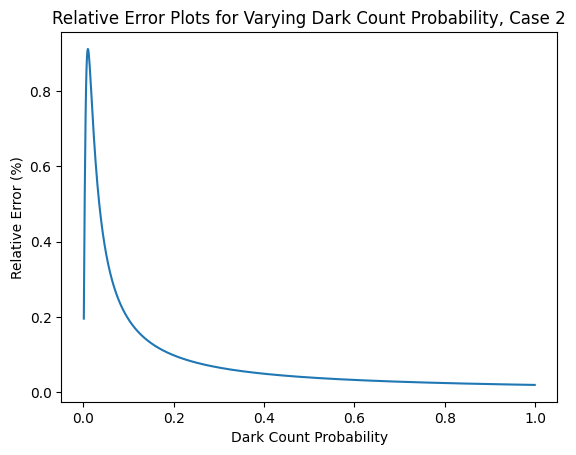

In [8]:
plt.plot(range_PD, error_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 2')
plt.savefig("relative_error_2_PD_1.png")
plt.show()

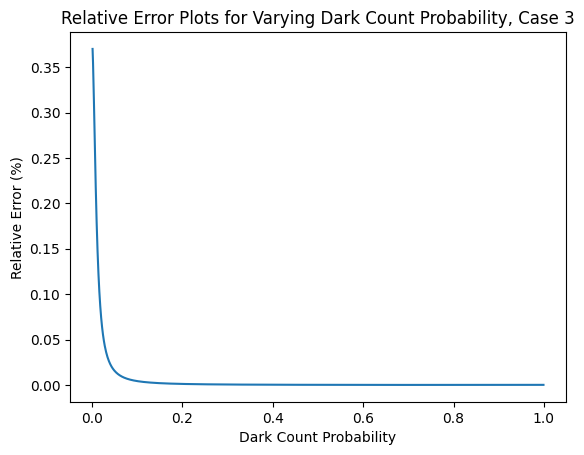

In [9]:
plt.plot(range_PD, error_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 3')
plt.savefig("relative_error_3_PD_1.png")
plt.show()

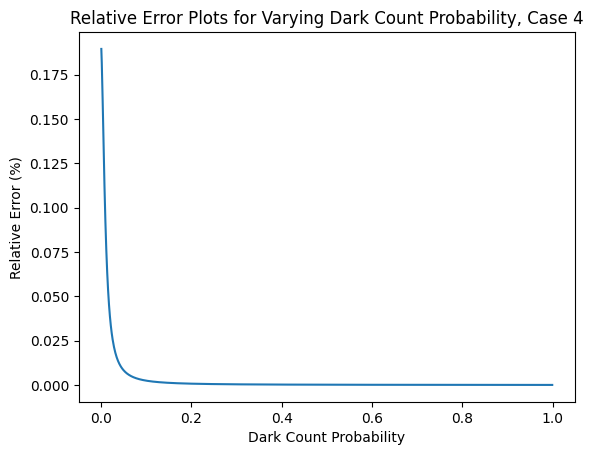

In [10]:
plt.plot(range_PD, error_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability, Case 4')
plt.savefig("relative_error_4_PD_1.png")
plt.show()

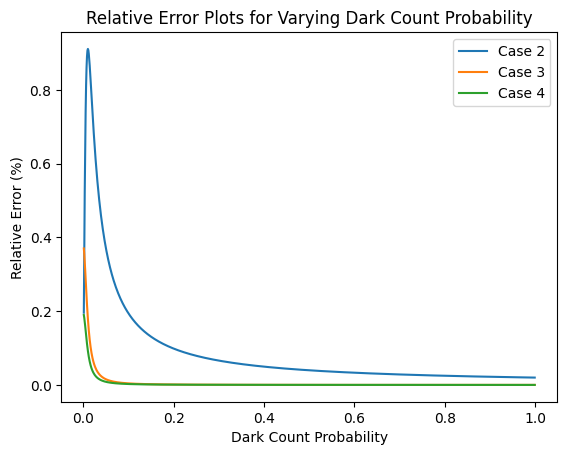

In [11]:
# Plot error bound based on varying dark count probability
plt.plot(range_PD, error_2_PD, label = 'Case 2')
plt.plot(range_PD, error_3_PD, label = 'Case 3')
plt.plot(range_PD, error_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("relative_error_PD_1.png")
plt.show()
# plt.close()

In [12]:
# Error bound based on varying detector efficiency
error_2_eta = []
error_3_eta = []
error_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    error_2_eta.append(case_2_error(P_D, eta, MU))
    error_3_eta.append(case_3_error(P_D, eta, MU))
    error_4_eta.append(case_4_error(P_D, eta, MU))
print(error_2_eta)
print(error_3_eta)
print(error_4_eta)

[0.00018724659635714776, 0.00017906983819237915, 0.0001717617229324177, 0.0001654292768726231, 0.00016009315890641826, 0.00015576015513267503, 0.00015243313955345174, 0.0001501135488625988, 0.00014880217578452383, 0.00014849949655659894, 0.00014920580769240527, 0.00015092131202501145, 0.0001536461481648789, 0.00015738041667627206, 0.0001621241867085551, 0.00016787751458460787, 0.00017464044194358326, 0.00018241300247230307, 0.0001911952194372293, 0.00020098711470370518, 0.00021178870515236128, 0.0002236000056754441, 0.00023642102556116314, 0.0002502517757467893, 0.00026509226433218415, 0.0002809424992448297, 0.0002978024848539771, 0.0003156722273329253, 0.00033455173144306507, 0.000354441001976795, 0.0003753400411333548, 0.0003972488531209412, 0.000420167440955275, 0.00044409580794585885, 0.00046903395537315184, 0.0004949818862570204, 0.0005219396028320182, 0.0005499071076421326, 0.0005788844016091819, 0.0006088714870628268, 0.0006398683657833743, 0.0006718750399981623, 0.0007048915103

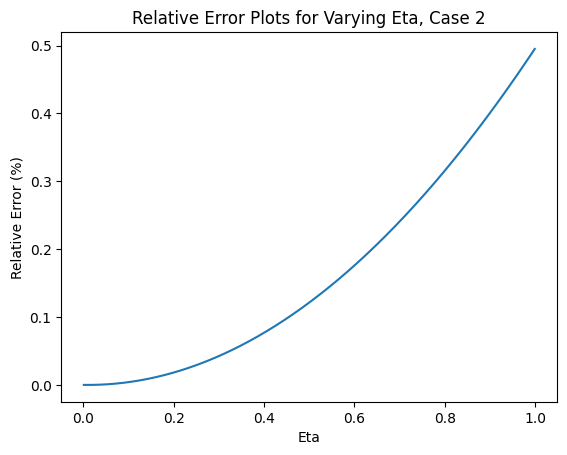

In [13]:
plt.plot(range_eta, error_2_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 2')
plt.savefig("relative_error_2_eta_1.png")
plt.show()

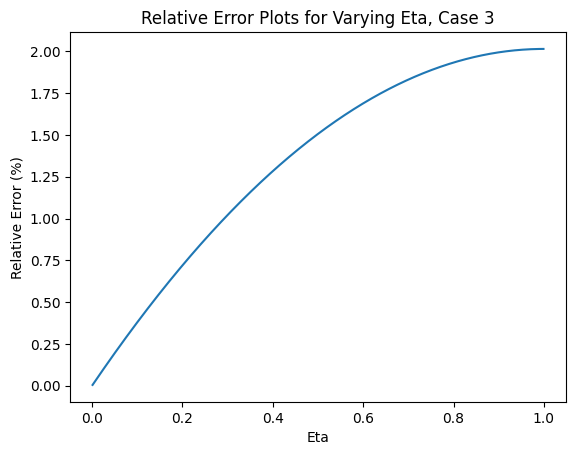

In [14]:
plt.plot(range_eta, error_3_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 3')
plt.savefig("relative_error_3_eta_1.png")
plt.show()

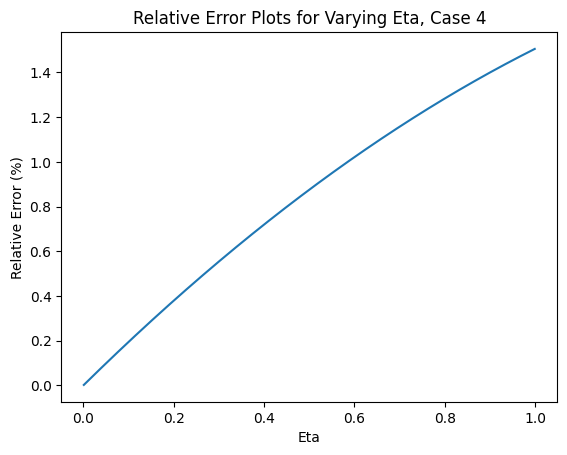

In [15]:
plt.plot(range_eta, error_4_eta)
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta, Case 4')
plt.savefig("relative_error_4_eta_1.png")
plt.show()

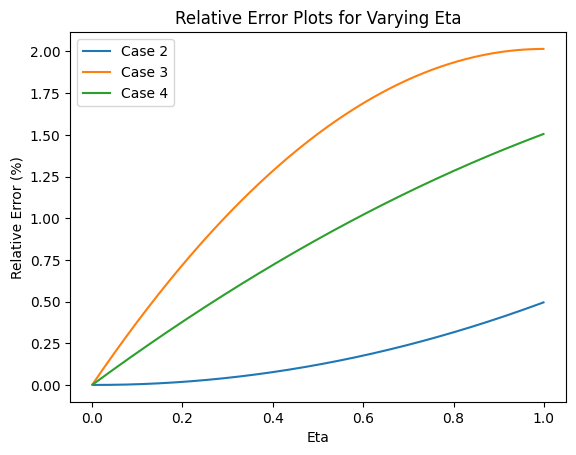

In [16]:
# Plot error bound based on varying detector efficiency
plt.plot(range_eta, error_2_eta, label = 'Case 2')
plt.plot(range_eta, error_3_eta, label = 'Case 3')
plt.plot(range_eta, error_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Eta')
plt.legend()
plt.savefig("relative_error_eta_1.png")
plt.show()
# plt.close()

In [17]:
# Error bound based on varying mean number of photons detected on some time interval
error_2_mu = []
error_3_mu = []
error_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    error_2_mu.append(case_2_error(P_D, ETA, mu))
    error_3_mu.append(case_3_error(P_D, ETA, mu))
    error_4_mu.append(case_4_error(P_D, ETA, mu))
print(error_2_mu)
print(error_3_mu)
print(error_4_mu)

[0.00044747824680792107, 0.000690217520392873, 0.0009282207677253881, 0.0011614946571199838, 0.0013900458367200055, 0.001613880941687051, 0.0018330065946055444, 0.0020474294061831448, 0.002257155975144766, 0.0024621928882805123, 0.0026625467206414914, 0.0028582240354199217, 0.0030492313840214374, 0.0032355753061657127, 0.0034172623298042125, 0.003594298971230372, 0.0037666917350726295, 0.0039344471143133745, 0.004097571590295837, 0.004256071632830895, 0.004409953700203573, 0.004559224238988895, 0.004703889684519552, 0.004843956460446242, 0.00497943097905587, 0.005110319641180351, 0.0052366288361612645, 0.00535836494217309, 0.005475534325826411, 0.005588143342599227, 0.005696198336478638, 0.00579970564026215, 0.005898671575434149, 0.00599310245243169, 0.006083004570240148, 0.006168384216865366, 0.006249247669080458, 0.006325601192569424, 0.006397451041791172, 0.006464803460175775, 0.006527664680282163, 0.006586040923452182, 0.0066399383999523895, 0.006689363309306249, 0.0067343218398954

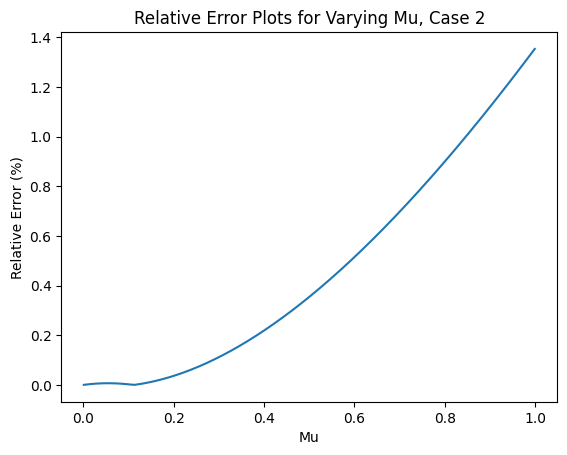

In [18]:
plt.plot(range_mu, error_2_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 2')
plt.savefig("relative_error_2_mu_1.png")
plt.show()

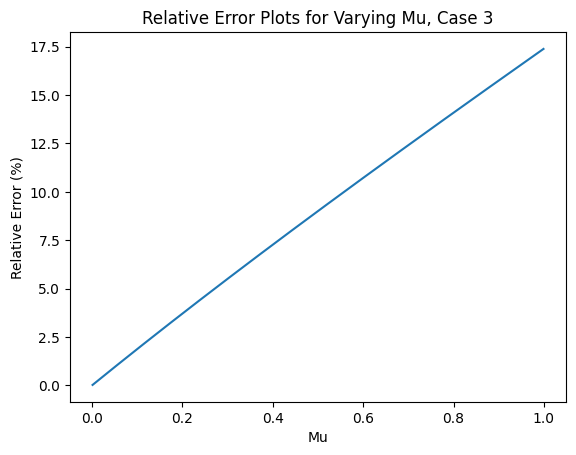

In [19]:
plt.plot(range_mu, error_3_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 3')
plt.savefig("relative_error_3_mu_1.png")
plt.show()

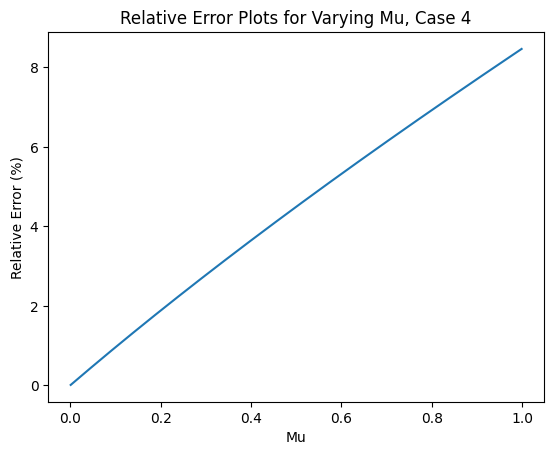

In [20]:
plt.plot(range_mu, error_4_mu)
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu, Case 4')
plt.savefig("relative_error_4_mu_1.png")
plt.show()

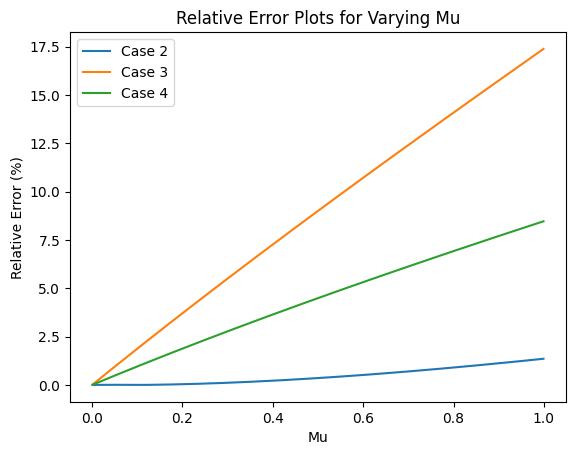

In [21]:
# Plot fidelities based on varying mean number of photons detected on some time interval
plt.plot(range_mu, error_2_mu, label = 'Case 2')
plt.plot(range_mu, error_3_mu, label = 'Case 3')
plt.plot(range_mu, error_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error Plots for Varying Mu')
plt.legend()
plt.savefig("relative_error_mu_1.png")
plt.show()
# plt.close()